# Cargo Theft Dataset Pre-Processing

In [1]:
# Import the necessary dependencies
import pandas as pd
import numpy as np

### Preprocessing the Data 

In [2]:
# Read the CSV file into a DataFrame.
theft_df = pd.read_csv("Resources/CT_2013_2021.csv")
theft_df.head()

,data_year,ori,pub_agency_name,pub_agency_unit,agency_type_name,state_abbr,state_name,division_name,county_name,region_name,...,weapon_code,weapon_name,prop_desc_code,data_year.1,prop_desc_code.1,prop_desc_name,stolen_value,recovered_value,recovered_flag,date_recovered
0,2021,TX0030000,Angelina,NaN,County,TX,Texas,West South Central,ANGELINA,South,...,NaN,NaN,20,2021,20,Money,375.0,0,False,NaN
1,2021,AL0010000,Jefferson,NaN,County,AL,Alabama,East South Central,JEFFERSON,South,...,NaN,NaN,77,2021,77,Other,1.0,0,False,NaN
2,2021,AL0010000,Jefferson,NaN,County,AL,Alabama,East South Central,JEFFERSON,South,...,NaN,NaN,65,2021,65,Identity Documents,0.0,0,False,NaN
3,2021,AL0010000,Jefferson,NaN,County,AL,Alabama,East South Central,JEFFERSON,South,...,NaN,NaN,13,2021,13,Firearms,320.0,0,False,NaN
4,2021,AL0010000,Jefferson,NaN,County,AL,Alabama,East South Central,JEFFERSON,South,...,NaN,NaN,77,2021,77,Other,1.0,0,False,NaN


In [3]:
# Data information
theft_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151492 entries, 0 to 151491
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   data_year              151492 non-null  int64  
 1   ori                    151492 non-null  object 
 2   pub_agency_name        151492 non-null  object 
 3   pub_agency_unit        1422 non-null    object 
 4   agency_type_name       151492 non-null  object 
 5   state_abbr             151492 non-null  object 
 6   state_name             151492 non-null  object 
 7   division_name          151492 non-null  object 
 8   county_name            151492 non-null  object 
 9   region_name            151492 non-null  object 
 10  population_group_code  151486 non-null  object 
 11  population_group_desc  151486 non-null  object 
 12  offense_code           151492 non-null  object 
 13  offense_name           151492 non-null  object 
 14  offender_race          83273 non-nul

In [4]:
# How many different values are each column
theft_df.nunique()

data_year                   9
ori                      3912
pub_agency_name          2935
pub_agency_unit           147
agency_type_name            8
state_abbr                 50
state_name                 50
division_name              10
county_name              1227
region_name                 5
population_group_code      19
population_group_desc      19
offense_code               40
offense_name               40
offender_race               6
offender_ethnicity          4
offender_age               87
offender_sex                3
victim_type_code            9
victim_type_name            9
location_code              47
location_name              47
weapon_code                19
weapon_name                19
prop_desc_code             68
data_year.1                 9
prop_desc_code.1           68
prop_desc_name             68
stolen_value             5265
recovered_value          1144
recovered_flag              2
date_recovered           2431
dtype: int64

In [5]:
# Null Values 
theft_df.isna().sum()

data_year                     0
ori                           0
pub_agency_name               0
pub_agency_unit          150070
agency_type_name              0
state_abbr                    0
state_name                    0
division_name                 0
county_name                   0
region_name                   0
population_group_code         6
population_group_desc         6
offense_code                  0
offense_name                  0
offender_race             68219
offender_ethnicity        68219
offender_age              72765
offender_sex              68219
victim_type_code              0
victim_type_name              0
location_code                 0
location_name                 0
weapon_code              138505
weapon_name              138505
prop_desc_code                0
data_year.1                   0
prop_desc_code.1              0
prop_desc_name                0
stolen_value                271
recovered_value               0
recovered_flag                0
date_rec

In [6]:
# Duplicated Values
theft_df.duplicated().sum()

14518

In [7]:
dropped = ["ori", "data_year.1", "prop_desc_code.1", "state_abbr"]

In [8]:
# Transformation and remove duplicate entries
theft_original_df = theft_df.drop(columns = ["ori", "data_year.1", "prop_desc_code.1", "state_abbr"], axis = 1).drop_duplicates()
print(theft_original_df.shape)
theft_original_df.head() 

(136974, 28)


,data_year,pub_agency_name,pub_agency_unit,agency_type_name,state_name,division_name,county_name,region_name,population_group_code,population_group_desc,...,location_code,location_name,weapon_code,weapon_name,prop_desc_code,prop_desc_name,stolen_value,recovered_value,recovered_flag,date_recovered
0,2021,Angelina,NaN,County,Texas,West South Central,ANGELINA,South,8B,"Non-MSA counties from 25,000 thru 99,999",...,25,Other/Unknown,NaN,NaN,20,Money,375.0,0,False,NaN
1,2021,Jefferson,NaN,County,Alabama,East South Central,JEFFERSON,South,9A,"MSA counties 100,000 or over",...,20,Residence/Home,NaN,NaN,77,Other,1.0,0,False,NaN
2,2021,Jefferson,NaN,County,Alabama,East South Central,JEFFERSON,South,9A,"MSA counties 100,000 or over",...,20,Residence/Home,NaN,NaN,65,Identity Documents,0.0,0,False,NaN
3,2021,Jefferson,NaN,County,Alabama,East South Central,JEFFERSON,South,9A,"MSA counties 100,000 or over",...,20,Residence/Home,NaN,NaN,13,Firearms,320.0,0,False,NaN
4,2021,Jefferson,NaN,County,Alabama,East South Central,JEFFERSON,South,9A,"MSA counties 100,000 or over",...,20,Residence/Home,NaN,NaN,77,Other,1.0,0,False,NaN


In [9]:
# Write this DataFrame out to a CSV file
theft_original_df.to_csv("Resources/cargo_theft_original.csv", index=False)

### Null Values in Dataset 

In [10]:
#'public_agency_unit' column
theft_original_df.pub_agency_unit.value_counts()

New Castle County    113
Keyser               109
Princeton            101
Lake Norman           56
Lake James            50
                    ... 
Accomack County        1
Gibson County          1
Hamilton County        1
Grayson County         1
Berkeley County        1
Name: pub_agency_unit, Length: 147, dtype: int64

In [11]:
#'population_group_code' column
theft_original_df.population_group_code.value_counts()

5     15941
4     15810
1B    15375
9A    14764
3     12385
6      9887
2      9679
1C     9166
9B     8830
1A     6483
8B     5296
8C     4343
7      4227
8D     1837
9C     1732
9D     1157
8E       50
8A        4
9E        2
Name: population_group_code, dtype: int64

In [12]:
#'population_group_desc' column
theft_original_df.population_group_desc.value_counts()

Cities from 10,000 thru 24,999              15941
Cities from 25,000 thru 49,999              15810
Cities from 500,000 thru 999,999            15375
MSA counties 100,000 or over                14764
Cities from 50,000 thru 99,999              12385
Cities from 2,500 thru 9,999                 9887
Cities from 100,000 thru 249,999             9679
Cities from 250,000 thru 499,999             9166
MSA counties from 25,000 thru 99,999         8830
Cities 1,000,000 or over                     6483
Non-MSA counties from 25,000 thru 99,999     5296
Non-MSA counties from 10,000 thru 24,999     4343
Cities under 2,500                           4227
Non-MSA counties under 10,000                1837
MSA counties from 10,000 thru 24,999         1732
MSA counties under 10,000                    1157
Non-MSA State Police                           50
Non-MSA counties 100,000 or over                4
MSA State Police                                2
Name: population_group_desc, dtype: int64

In [13]:
#'offender_race' column
theft_original_df.offender_race.value_counts()

White                                        32591
Black or African American                    21170
Unknown                                      20801
American Indian or Alaska Native               693
Asian                                          269
Native Hawaiian or Other Pacific Islander       17
Name: offender_race, dtype: int64

In [14]:
#'offender_ethnicity' column
theft_original_df.offender_ethnicity.value_counts()

Not Hispanic or Latino    29452
Not Specified             22171
Unknown                   20046
Hispanic or Latino         3872
Name: offender_ethnicity, dtype: int64

In [15]:
#'offender_age' column
theft_original_df.offender_age.value_counts().sort_index()

0.0     15926
1.0       169
4.0         4
5.0         7
6.0         3
        ...  
85.0        1
86.0        3
87.0        3
98.0       20
99.0      418
Name: offender_age, Length: 87, dtype: int64

In [16]:
#'offender_sex' column
theft_original_df.offender_sex.value_counts()

M    44856
U    18191
F    12494
Name: offender_sex, dtype: int64

In [17]:
#'weapon_code' column
theft_original_df.weapon_code.value_counts()

12     3666
40     2672
99     1532
20      666
11      616
90      600
95      436
12A     294
30      223
13      208
35      172
11A      78
15       71
14       67
85       22
70       18
13A      11
14A       2
50        2
Name: weapon_code, dtype: int64

In [18]:
#'weapon_name' column
theft_original_df.weapon_name.value_counts()

Handgun                           3666
Personal Weapons                  2672
None                              1532
Knife/Cutting Instrument           666
Firearm                            616
Other                              600
Unknown                            436
Handgun (Automatic)                294
Blunt Object                       223
Rifle                              208
Motor Vehicle/Vessel               172
Firearm (Automatic)                 78
Other Firearm                       71
Shotgun                             67
Asphyxiation                        22
Drugs/Narcotics/Sleeping Pills      18
Rifle (Automatic)                   11
Shotgun (Automatic)                  2
Poison                               2
Name: weapon_name, dtype: int64

In [19]:
#'stolen_value' column
theft_original_df.stolen_value.value_counts().sort_index()

0.0            11776
1.0            15517
2.0             1273
3.0              470
4.0              285
               ...  
25000000.0         6
25496498.0         1
120029400.0        1
250000000.0        1
311128346.0        1
Name: stolen_value, Length: 5265, dtype: int64

In [20]:
#'date_recoverd' column
theft_original_df.date_recovered.value_counts()

2019-10-09    127
2016-10-07    121
2020-09-09    108
2020-12-28     96
2020-08-19     95
             ... 
2018-10-01      1
2018-03-20      1
2015-06-18      1
2015-05-17      1
2013-03-11      1
Name: date_recovered, Length: 2431, dtype: int64

In [21]:
# DataFrame in general
theft_original_df.agency_type_name.value_counts()

City                     96897
County                   36861
State Police              1108
University or College      755
Other                      739
Other State Agency         533
Tribal                      67
Federal                     14
Name: agency_type_name, dtype: int64

In [22]:
# Offenses types
theft_original_df.offense_name.value_counts()

Theft From Motor Vehicle                       35024
All Other Larceny                              29737
Burglary/Breaking & Entering                   21125
Motor Vehicle Theft                            14899
Destruction/Damage/Vandalism of Property        7458
Theft From Building                             6767
Robbery                                         4993
False Pretenses/Swindle/Confidence Game         3384
Credit Card/Automated Teller Machine Fraud      2634
Drug/Narcotic Violations                        1707
Stolen Property Offenses                        1171
Impersonation                                    877
Weapon Law Violations                            875
Embezzlement                                     853
Drug Equipment Violations                        831
Identity Theft                                   830
Simple Assault                                   782
Aggravated Assault                               535
Counterfeiting/Forgery                        

In [23]:
# Offenses codes
theft_original_df.offense_code.value_counts()

23F    35024
23H    29737
220    21125
240    14899
290     7458
23D     6767
120     4993
26A     3384
26B     2634
35A     1707
280     1171
26C      877
520      875
270      853
35B      831
26F      830
13B      782
13A      535
250      464
23G      399
100      380
23C      309
13C      234
26E      166
210      103
23A       82
23B       75
11A       53
09A       47
23E       43
200       38
26G       38
11D       21
370       16
64B       16
11B        3
720        2
510        1
26D        1
11C        1
Name: offense_code, dtype: int64

In [24]:
# Replace empty values
# Fixing categorical values
theft_original_df['offender_race'].fillna('Unknown', inplace = True)
theft_original_df['offender_ethnicity'].fillna('Unknown', inplace = True)
theft_original_df['offender_age'].fillna(0.0, inplace = True)
theft_original_df['offender_sex'].fillna('U', inplace = True)
theft_original_df['stolen_value'].fillna(0, inplace = True)
theft_original_df.weapon_code = theft_original_df.weapon_code.fillna("95")
theft_original_df.weapon_name = theft_original_df.weapon_name.fillna("Unknown")
theft_original_df.population_group_desc = theft_original_df.population_group_desc.fillna("National")
theft_original_df.population_group_code = theft_original_df.population_group_code.fillna("0")

In [25]:
# Not necessary columns
not_added = ["Destruction/Damage/Vandalism of Property", "Drug/Narcotic Violations", "Impersonation", "Weapon Law Violations", "Drug Equipment Violations",
            "Simple Assault", "Aggravated Assault", "Kidnapping/Abduction", "Intimidation","Extortion/Blackmail", "Rape", "Murder and Nonnegligent Manslaughter",
            "Arson", "Hacking/Computer Invasion", "Fondling", "Pornography/Obscene Material","Human Trafficking, Involuntary Servitude", "Sodomy",
            "Animal Cruelty", "Bribery", "Sexual Assault With An Object"]

cleaned_data = theft_original_df.loc[~theft_original_df.offense_name.isin(not_added)]
print(cleaned_data.shape)
cleaned_data.head() 

(122956, 28)


,data_year,pub_agency_name,pub_agency_unit,agency_type_name,state_name,division_name,county_name,region_name,population_group_code,population_group_desc,...,location_code,location_name,weapon_code,weapon_name,prop_desc_code,prop_desc_name,stolen_value,recovered_value,recovered_flag,date_recovered
0,2021,Angelina,NaN,County,Texas,West South Central,ANGELINA,South,8B,"Non-MSA counties from 25,000 thru 99,999",...,25,Other/Unknown,95,Unknown,20,Money,375.0,0,False,NaN
1,2021,Jefferson,NaN,County,Alabama,East South Central,JEFFERSON,South,9A,"MSA counties 100,000 or over",...,20,Residence/Home,95,Unknown,77,Other,1.0,0,False,NaN
2,2021,Jefferson,NaN,County,Alabama,East South Central,JEFFERSON,South,9A,"MSA counties 100,000 or over",...,20,Residence/Home,95,Unknown,65,Identity Documents,0.0,0,False,NaN
3,2021,Jefferson,NaN,County,Alabama,East South Central,JEFFERSON,South,9A,"MSA counties 100,000 or over",...,20,Residence/Home,95,Unknown,13,Firearms,320.0,0,False,NaN
4,2021,Jefferson,NaN,County,Alabama,East South Central,JEFFERSON,South,9A,"MSA counties 100,000 or over",...,20,Residence/Home,95,Unknown,77,Other,1.0,0,False,NaN


In [26]:
# Check the results.
cleaned_data.offense_code.value_counts()

23F    35024
23H    29737
220    21125
240    14899
23D     6767
120     4993
26A     3384
26B     2634
280     1171
270      853
26F      830
250      464
23G      399
23C      309
26E      166
23A       82
23B       75
23E       43
26D        1
Name: offense_code, dtype: int64

In [27]:
cleaned_data.describe()['stolen_value']

count    1.229560e+05
mean     1.251784e+04
std      1.200240e+06
min      0.000000e+00
25%      2.000000e+01
50%      2.500000e+02
75%      1.200000e+03
max      3.111283e+08
Name: stolen_value, dtype: float64

In [28]:
# Write this DataFrame out to a CSV file
cleaned_data.to_csv("Resources/cargo_theft_cleaned.csv", index = False)

In [29]:
# Determine which columns will be used as features and which column will be the target.
# For this case, it is easier to drop unneeded columns.
not_added = ["data_year", "pub_agency_unit", "population_group_desc", "offense_name", "victim_type_name", "location_name", "weapon_name", "prop_desc_name", "recovered_value", "date_recovered"]
binary_data = cleaned_data.drop(columns = not_added, axis = 1)
print(binary_data.shape)
binary_data.head() 

(122956, 18)


,pub_agency_name,agency_type_name,state_name,division_name,county_name,region_name,population_group_code,offense_code,offender_race,offender_ethnicity,offender_age,offender_sex,victim_type_code,location_code,weapon_code,prop_desc_code,stolen_value,recovered_flag
0,Angelina,County,Texas,West South Central,ANGELINA,South,8B,26B,Unknown,Unknown,0.0,U,I,25,95,20,375.0,False
1,Jefferson,County,Alabama,East South Central,JEFFERSON,South,9A,23H,Unknown,Unknown,0.0,U,I,20,95,77,1.0,False
2,Jefferson,County,Alabama,East South Central,JEFFERSON,South,9A,23H,Unknown,Unknown,0.0,U,I,20,95,65,0.0,False
3,Jefferson,County,Alabama,East South Central,JEFFERSON,South,9A,23H,Unknown,Unknown,0.0,U,I,20,95,13,320.0,False
4,Jefferson,County,Alabama,East South Central,JEFFERSON,South,9A,23F,Unknown,Unknown,0.0,U,I,20,95,77,1.0,False


In [30]:
# Write this DataFrame out to a CSV file
binary_data.to_csv("Resources/binary_classifier.csv", index = False)

## Logistic Regression

In [31]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
import patsy
import itertools

In [32]:
# Transform text/object into numerical data for features to be used. 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

binary_data['population_group_code'] = le.fit_transform(cleaned_data['population_group_code'])
binary_data['offense_code'] = le.fit_transform(cleaned_data['offense_code'])
binary_data['offender_race'] = le.fit_transform(cleaned_data['offender_race'])
binary_data['offender_ethnicity'] = le.fit_transform(cleaned_data['offender_ethnicity'])
binary_data['offender_sex'] = le.fit_transform(cleaned_data['offender_sex'])
binary_data['victim_type_code'] = le.fit_transform(cleaned_data['victim_type_code'])
binary_data['recovered_flag'] = le.fit_transform(cleaned_data['recovered_flag'])

In [33]:
X = binary_data[['population_group_code','offense_code','offender_race',
    'offender_ethnicity','offender_age','offender_sex','victim_type_code','location_code',
    'prop_desc_code','stolen_value']]

y = binary_data['recovered_flag']

In [34]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,population_group_code,3.542983
1,offense_code,4.057491
2,offender_race,13.655167
3,offender_ethnicity,14.380545
4,offender_age,2.217070
5,offender_sex,14.020552
6,victim_type_code,3.816982
7,location_code,5.148715
8,prop_desc_code,2.538717
9,stolen_value,1.000263


In [35]:
# split the dataset into training and testing sets:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)
X_train.shape

(92217, 10)

In [36]:
# Fitting model - Logit Regression
import statsmodels.api as sm
X_train['intercept'] = 1.0
logit = sm.Logit(y_train, X_train)
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.377012
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         recovered_flag   No. Observations:                92217
Model:                          Logit   Df Residuals:                    92206
Method:                           MLE   Df Model:                           10
Date:                Thu, 09 Feb 2023   Pseudo R-squ.:                 0.07130
Time:                        16:49:04   Log-Likelihood:                -34767.
converged:                       True   LL-Null:                       -37436.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
population_group_code    -0.0121      0.002     -5.724      0.000      -0.016      -0.008
offense_code              0.0620      0.003     24.659      0.000       0.057       0.067
offender_race             0.0187      0.009      2.136      0.033       0.002       0.036
offender_ethnicity       -0.3449      0.013    -25.602      0.000      -0.371      -0.319
offender_age              0.0065      0.001      9.813      0.000       0.005       0.008
offender_sex             -0.3664      0.020    -18.439      0.000      -0.405      -0.327
victim_type_code         -0.0344      0.007     -5.178      0.000      -0.047      -0.021
location_code            -0.0015      0.001     -1.383      0.167      -0.004       0.001
prop_desc_code           -0.0049      0.000    -13.194      0.000      -0.006      -0.004
stolen_value           4.621e-09   5.17e-09      0.894      0.371   -5.51e-09    1.48e-08
intercept                -0.8176      0.060    -13.702      0.000      -0.935      -0.701
=========================================================================================
"""

In [37]:
# Binomial Logistic Regression
log_reg = sm.GLM(y_train, X_train, family=sm.families.Binomial()).fit()
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         recovered_flag   No. Observations:                92217
Model:                            GLM   Df Residuals:                    92206
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34767.
Date:                Thu, 09 Feb 2023   Deviance:                       69534.
Time:                        16:49:05   Pearson chi2:                 8.90e+04
No. Iterations:                     5   Pseudo R-squ. (CS):            0.05625
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
population_group_code    -0.0121      0.002     -5.724      0.000      -0.016      -0.008
offense_code              0.0620      0.003     24.659      0.000       0.057       0.067
offender_race             0.0187      0.009      2.136      0.033       0.002       0.036
offender_ethnicity       -0.3449      0.013    -25.602      0.000      -0.371      -0.319
offender_age              0.0065      0.001      9.813      0.000       0.005       0.008
offender_sex             -0.3664      0.020    -18.439      0.000      -0.405      -0.327
victim_type_code         -0.0344      0.007     -5.178      0.000      -0.047      -0.021
location_code            -0.0015      0.001     -1.383      0.167      -0.004       0.001
prop_desc_code           -0.0049      0.000    -13.194      0.000      -0.006      -0.004
stolen_value           4.621e-09   5.17e-09      0.894      0.371   -5.51e-09    1.48e-08
intercept                -0.8176      0.060    -13.702      0.000      -0.935      -0.701
=========================================================================================
"""

In [38]:
X=sm.add_constant(X)
#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model=sm.Logit(y_train,X_train,random_state=0)
result=model.fit()
print(result.summary())

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['random_state']
  warnings.warn(msg, ValueWarning)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['random_state']
  warnings.warn(msg, ValueWarning)


Optimization terminated successfully.
         Current function value: 0.376323
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         recovered_flag   No. Observations:                98364
Model:                          Logit   Df Residuals:                    98353
Method:                           MLE   Df Model:                           10
Date:                Thu, 09 Feb 2023   Pseudo R-squ.:                 0.07296
Time:                        16:49:05   Log-Likelihood:                -37017.
converged:                       True   LL-Null:                       -39930.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.8166      0.058    -14.144      0.000      -0.930      -0.

In [39]:
# Fetching the statistics
stat_df=pd.DataFrame({'coefficients':result.params, 'p-value': result.pvalues, 'odds_ratio': np.exp(result.params)})
stat_df

,coefficients,p-value,odds_ratio
const,-8.165584e-01,2.021458e-45,0.441950
population_group_code,-1.466845e-02,8.167097e-13,0.985439
offense_code,6.359470e-02,7.985539e-150,1.065660
offender_race,1.848176e-02,2.911607e-02,1.018654
offender_ethnicity,-3.475229e-01,2.142245e-156,0.706436
offender_age,7.303784e-03,3.161318e-30,1.007331
offender_sex,-3.544591e-01,2.239136e-75,0.701553
victim_type_code,-3.749586e-02,6.468313e-09,0.963198
location_code,-2.616511e-03,1.495732e-02,0.997387
prop_desc_code,-4.629227e-03,1.062554e-37,0.995381


In [40]:
# Condition for significant parameters
significant_params=stat_df[stat_df['p-value']<=0.05].index
significant_params= significant_params.drop('const')
significant_params

Index(['population_group_code', 'offense_code', 'offender_race',
       'offender_ethnicity', 'offender_age', 'offender_sex',
       'victim_type_code', 'location_code', 'prop_desc_code'],
      dtype='object')

In [41]:
print('Total number of parameters: %s '%len(X.keys()) )
stat_df.loc[significant_params].sort_values('odds_ratio', ascending=False)['odds_ratio']

Total number of parameters: 11 


offense_code             1.065660
offender_race            1.018654
offender_age             1.007331
location_code            0.997387
prop_desc_code           0.995381
population_group_code    0.985439
victim_type_code         0.963198
offender_ethnicity       0.706436
offender_sex             0.701553
Name: odds_ratio, dtype: float64

In [42]:
# create a logistic regression model with the specified arguments
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', max_iter=200, random_state=42)
classifier

LogisticRegression(max_iter=200, random_state=42)

In [43]:
# trained the model with the training data:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=42)

In [44]:
y_pred=result.predict(X_test)

In [45]:
# ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# To get roc stats in df
roc_df=pd.DataFrame({'thresholds': thresholds,'tpr':tpr,'fpr':fpr})

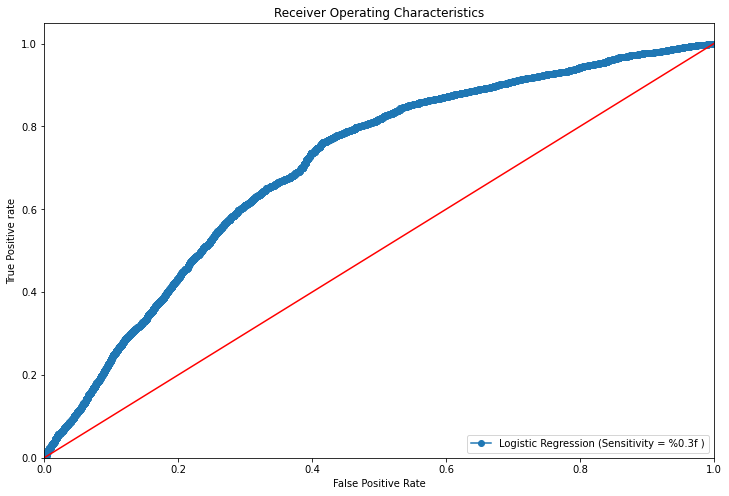

In [46]:
import matplotlib.pyplot as plt
# Plotting the ROC curve
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label= 'Logistic Regression (Sensitivity = %0.3f )', marker='o')
plt.plot([0,1], [0,1] , 'r-')
plt.xlim(0,1)
plt.ylim(0,1.05)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc='lower right')
plt.show()

In [47]:
# Converting y into binary. Here 0.5 is the threshold
opt_thr=0.5
y_pred=result.predict(X_test)
y_pred= np.where(y_pred>opt_thr,1,0)

In [48]:
# to create predictions based on X_test.
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
96801,0,0
29570,0,0
127632,0,0
106584,0,0
149368,0,0
...,...,...
111198,0,0
147789,0,0
26074,0,0
145189,0,0


Text(33.0, 0.5, 'Actual Output')

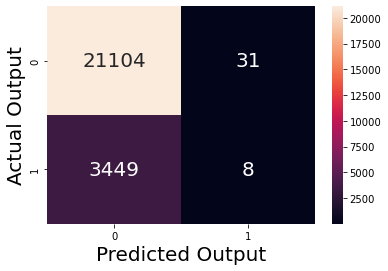

In [49]:
# Getting confusion Matrix
import seaborn as sns
cm= confusion_matrix(y_test,y_pred)
ax=sns.heatmap(cm, annot=True, fmt="0", annot_kws={"size":20})
plt.xlabel('Predicted Output', fontsize=20)
plt.ylabel('Actual Output', fontsize=20)

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.8594258295380611

In [51]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92     21135
           1       0.21      0.00      0.00      3457

    accuracy                           0.86     24592
   macro avg       0.53      0.50      0.46     24592
weighted avg       0.77      0.86      0.79     24592



## Logistic Regression 2 - Dropped offender_sex, offender_race and offender_ethnicity columns

In [52]:
X1 = binary_data[['population_group_code','offense_code','offender_age','victim_type_code','location_code',
    'prop_desc_code','stolen_value']]

y1 = binary_data['recovered_flag']

In [53]:
vif_data1 = pd.DataFrame()
vif_data1["feature"] = X1.columns
vif_data1["VIF"] = [variance_inflation_factor(X1.values, i) for i in range(len(X1.columns))]
vif_data1

,feature,VIF
0,population_group_code,3.170106
1,offense_code,3.310374
2,offender_age,1.458783
3,victim_type_code,3.372951
4,location_code,4.153879
5,prop_desc_code,2.314177
6,stolen_value,1.000176


In [54]:
# split the dataset into training and testing sets:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, random_state=42, stratify=y)
X_train1.shape

(92217, 7)

In [55]:
# Fitting model - Logit Regression
import statsmodels.api as sm
X_train1['intercept'] = 1.0
logit = sm.Logit(y_train1, X_train1)
result1 = logit.fit()
result1.summary()

Optimization terminated successfully.
         Current function value: 0.386981
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         recovered_flag   No. Observations:                92217
Model:                          Logit   Df Residuals:                    92209
Method:                           MLE   Df Model:                            7
Date:                Thu, 09 Feb 2023   Pseudo R-squ.:                 0.04675
Time:                        16:49:09   Log-Likelihood:                -35686.
converged:                       True   LL-Null:                       -37436.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
population_group_code    -0.0079      0.002     -3.891      0.000      -0.012      -0.004
offense_code              0.0661      0.003     25.978      0.000       0.061       0.071
offender_age              0.0232      0.000     49.142      0.000       0.022       0.024
victim_type_code         -0.0326      0.007     -4.866      0.000      -0.046      -0.019
location_code            -0.0028      0.001     -2.540      0.011      -0.005      -0.001
prop_desc_code           -0.0054      0.000    -14.475      0.000      -0.006      -0.005
stolen_value           6.756e-09    5.4e-09      1.250      0.211   -3.83e-09    1.73e-08
intercept                -2.2885      0.038    -59.620      0.000      -2.364      -2.213
=========================================================================================
"""

In [56]:
# Binomial Logistic Regression
log_reg1 = sm.GLM(y_train1, X_train1, family=sm.families.Binomial()).fit()
log_reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         recovered_flag   No. Observations:                92217
Model:                            GLM   Df Residuals:                    92209
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -35686.
Date:                Thu, 09 Feb 2023   Deviance:                       71372.
Time:                        16:49:10   Pearson chi2:                 8.93e+04
No. Iterations:                     5   Pseudo R-squ. (CS):            0.03724
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
population_group_code    -0.0079      0.002     -3.891      0.000      -0.012      -0.004
offense_code              0.0661      0.003     25.978      0.000       0.061       0.071
offender_age              0.0232      0.000     49.142      0.000       0.022       0.024
victim_type_code         -0.0326      0.007     -4.866      0.000      -0.046      -0.019
location_code            -0.0028      0.001     -2.540      0.011      -0.005      -0.001
prop_desc_code           -0.0054      0.000    -14.475      0.000      -0.006      -0.005
stolen_value           6.756e-09    5.4e-09      1.250      0.211   -3.83e-09    1.73e-08
intercept                -2.2885      0.038    -59.620      0.000      -2.364      -2.213
=========================================================================================
"""

In [57]:
X1=sm.add_constant(X1)
#Splitting the dataset
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=0)
model1=sm.Logit(y_train1,X_train1,random_state=0)
result1=model1.fit()
print(result1.summary())

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['random_state']
  warnings.warn(msg, ValueWarning)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['random_state']
  warnings.warn(msg, ValueWarning)


Optimization terminated successfully.
         Current function value: 0.386155
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         recovered_flag   No. Observations:                98364
Model:                          Logit   Df Residuals:                    98356
Method:                           MLE   Df Model:                            7
Date:                Thu, 09 Feb 2023   Pseudo R-squ.:                 0.04874
Time:                        16:49:10   Log-Likelihood:                -37984.
converged:                       True   LL-Null:                       -39930.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -2.2737      0.037    -61.159      0.000      -2.347      -2.

In [58]:
# Fetching the statistics
stat_df1=pd.DataFrame({'coefficients':result1.params, 'p-value': result1.pvalues, 'odds_ratio': np.exp(result1.params)})
stat_df1

,coefficients,p-value,odds_ratio
const,-2.273662e+00,0.000000e+00,0.102935
population_group_code,-1.056185e-02,1.050558e-07,0.989494
offense_code,6.754705e-02,6.783185e-165,1.069881
offender_age,2.370624e-02,0.000000e+00,1.023989
victim_type_code,-3.592191e-02,3.251489e-08,0.964716
location_code,-3.727815e-03,4.833182e-04,0.996279
prop_desc_code,-5.071064e-03,1.318972e-45,0.994942
stolen_value,6.293180e-09,2.242061e-01,1.000000


In [59]:
# Condition for significant parameters
significant_params1=stat_df1[stat_df1['p-value']<=0.05].index
significant_params1= significant_params1.drop('const')
significant_params1

Index(['population_group_code', 'offense_code', 'offender_age',
       'victim_type_code', 'location_code', 'prop_desc_code'],
      dtype='object')

In [60]:
print('Total number of parameters: %s '%len(X1.keys()) )
stat_df1.loc[significant_params1].sort_values('odds_ratio', ascending=False)['odds_ratio']

Total number of parameters: 8 


offense_code             1.069881
offender_age             1.023989
location_code            0.996279
prop_desc_code           0.994942
population_group_code    0.989494
victim_type_code         0.964716
Name: odds_ratio, dtype: float64

In [61]:
# create a logistic regression model with the specified arguments
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(solver='lbfgs', max_iter=200, random_state=42)
classifier1

LogisticRegression(max_iter=200, random_state=42)

In [62]:
# trained the model with the training data:
classifier1.fit(X_train1, y_train1)

LogisticRegression(max_iter=200, random_state=42)

In [63]:
y_pred1=result1.predict(X_test1)

In [64]:
# ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
fpr1, tpr1, thresholds1 = roc_curve(y_test1, y_pred1)
# To get roc stats in df
roc_df1=pd.DataFrame({'thresholds': thresholds1, 'tpr':tpr1, 'fpr':fpr1})

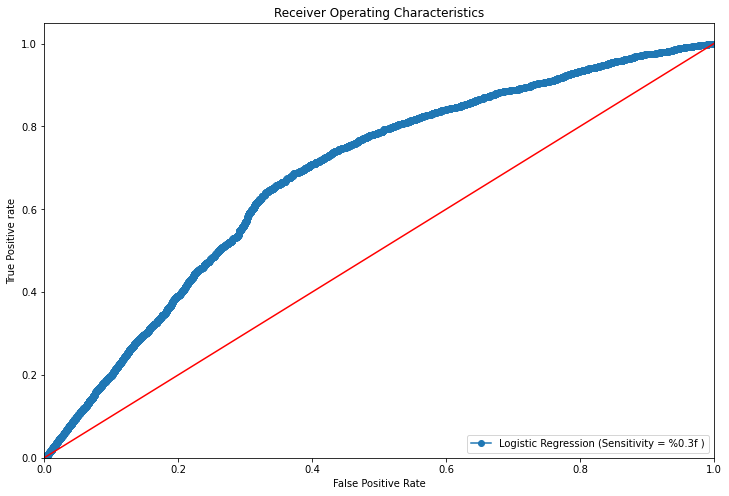

In [68]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# Plotting the ROC curve
plt.figure(figsize=(12,8))
plt.plot(fpr1, tpr1, label= 'Logistic Regression (Sensitivity = %0.3f )', marker = 'o')
plt.plot([0,1], [0,1] , 'r-')
plt.xlim(0,1)
plt.ylim(0,1.05)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc='lower right')
plt.show()

In [69]:
# Converting y into binary. Here 0.5 is the threshold
opt_thr=0.5
y_pred1=result1.predict(X_test1)
y_pred1= np.where(y_pred1>opt_thr,1,0)

In [70]:
# to create predictions based on X_test.
predictions1 = classifier1.predict(X_test1)
pd.DataFrame({"Prediction": predictions1, "Actual": y_test1})

,Prediction,Actual
96801,0,0
29570,0,0
127632,0,0
106584,0,0
149368,0,0
...,...,...
111198,0,0
147789,0,0
26074,0,0
145189,0,0


Text(33.0, 0.5, 'Actual Output')

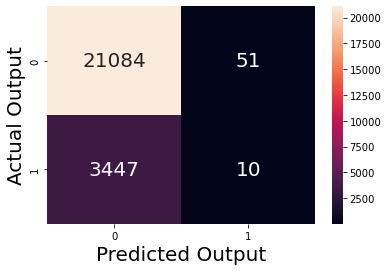

In [71]:
# Getting confusion Matrix
import seaborn as sns
cm1 = confusion_matrix(y_test1, y_pred1)
ax1 = sns.heatmap(cm1, annot=True, fmt="0", annot_kws={"size":20})
plt.xlabel('Predicted Output', fontsize=20)
plt.ylabel('Actual Output', fontsize=20)

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test1, predictions1)

0.8594258295380611

In [73]:
# Classification Report
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92     21135
           1       0.16      0.00      0.01      3457

    accuracy                           0.86     24592
   macro avg       0.51      0.50      0.46     24592
weighted avg       0.76      0.86      0.79     24592

